<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
<center>Автор материала: Мустаев Айрат (@airat).

# Обработка данных с АЦП ZetLab 

В рамках исследования по классификации отдельных типов объектов (человек, группа людей, животное) фиксируемых сигнализационными датчиками, таким как например: <b>точечный сейсмомагнитометрический датчик</b>, проводился эксперемент. В данной статье рассматривается алгоритм обработки эксперементальных (сырых) данных, получаемых с АЦП [(АЦП ЦАП Zet 230)](https://zetlab.com/shop/izmeritelnoe-oborudovanie/moduli-atsp-tsap/atsp-tsap-zet-230), для последуещего формирования признакового пространства и классификации. 

Под сырыми данными, понимаются синхронизированные по времени две реализации (сейсмический и магнитометрический сигналы) с частотой дискретизации Fs = 500 Гц. 

### Краткое описание природы данных

#### Сейсмическая волна
Сейсмическая волна - это волны, переносящие энергию упругих (механических) колебаний в горных породах. Источником сейсмической волны может быть землетрясение, взрыв, вибрация или <b>удар (в нашем случае проход объекта классификации)</b>. 
<p>Существует следующая классификация сейсмический волн:</p>
 * Объёмные волны - Объёмные волны проходят через недра Земли. Путь волн преломляется различной плотностью и жёсткостью подземных пород.
 * P-волны (первичные волны) — продольные, или компрессионные волны. Обычно их скорость в два раза быстрее S-волн, проходить они могут через любые материалы.
 * P- и S-волны в мантии и ядре.
 * Поверхностные волны несколько похожи на волны воды, но в отличие от них они путешествуют по земной поверхности. Их обычная скорость значительно ниже скорости волн тела. Из-за своей низкой частоты, времени действия и большой амплитуды они являются самыми разрушительными изо всех типов сейсмических волн.<img src="Image/Rayliegh_Love.jpg" width="500" height="500" >

 
#### Магнитометрический сигнал
Магнитометрический сигнал - это наведеное ЭДС в катушке при переносе над плоскостью катушки ферромагнитоного предмета.

Загрузим файлы сигналов:
 * для магнитометрических сигналов файл magnito.txt;
 * для сейсмических сигналов файл seismic.txt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_Magnito = open('file_signal/magnito.txt', 'r')
data_m = file_Magnito.read().split("\n")
file_Seismic = open('file_signal/seismic.txt', 'r')
data_s = file_Seismic.read().split("\n")
data_s = list(map(lambda signal: 
             list(map(lambda value: 
                 float(value), 
                     filter(lambda value2: value2 != '' and len(value2) > 0, 
                            signal.split(';')
                           )
                )), 
             data_s))

data_m = list(map(lambda signal: 
             list(map(lambda value: 
                 float(value), 
                     filter(lambda value2: value2 != '' and len(value2) > 0, 
                            signal.split(';')
                           )
                )), 
             data_m))

### Отобразим реализацию сейсмического и магнитометрического сигнала

Для примера возьмем реализацию сигналов с индексом 0.

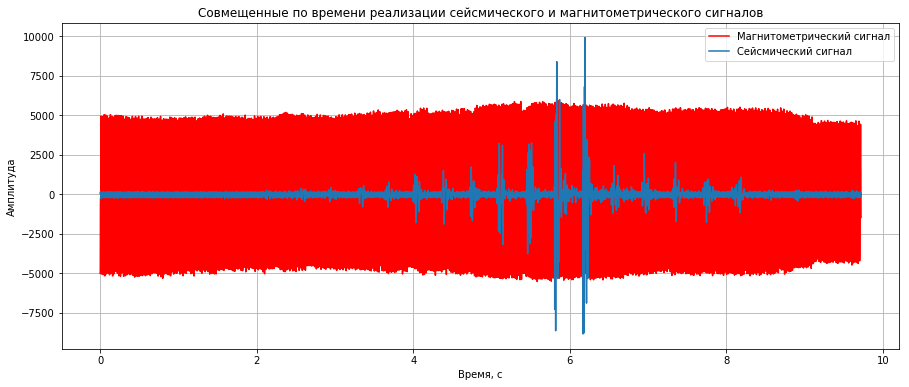

In [3]:
Fs=500 # Частота дискретизации
num_signal = 144
magnito_signal = data_m[num_signal][144:5004]
seismic_signal = data_s[num_signal][144:5004]
time_x = np.linspace(0,len(seismic_signal)/Fs, len(seismic_signal))
plt.figure(figsize = (15, 6))
plt.title('Совмещенные по времени реализации сейсмического и магнитометрического сигналов')
plt.plot(time_x,magnito_signal, 'r')
plt.plot(time_x,seismic_signal, )
plt.legend(['Магнитометрический сигнал', 'Сейсмический сигнал'])
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

Полученные сигналы сильно зашумлены, а для магнитометрического сигнала и вовсе не удается его рассмотреть.

### Рассмотрим спектры сигналов

Для построения спекторов воспользуемся библиотекой scipy и функцией fft для быстрого преобразования Фурье

In [4]:
from pylab import *
from scipy import fft

Подготовим функцию построения, визуализации спектра сигнала и самого сигнала

In [5]:
def CreatSpectrum(signal,Fs):
    n = len(signal) # Длительность сигнала
    k = arange(n)
    T = n/Fs
    frq = k/T 
    frq = frq[range(int(n/2))] # Диапазон частот
    
    Y = fft(signal)/n # Вычисление быстрого преобразования Фурье и его нормализация
    Y = np.abs(Y[range(int(n/2))])
    #print(np.max(Y))
    #print (list(Y).index(np.max(Y)))
    #print (frq[list(Y).index(np.max(Y))])
    PlotSpectrum(frq, Y)
    
def PlotSpectrum(frq, Y):
    
    plot(frq,abs(Y),'r')
    title('Спектр сигнала')
    xlabel('Частота (Гц)')
    ylabel('|Y(freq)|')
    plt.grid()
    
def PlotSignal(time_x,signal, name):
    
    plot(time_x,signal)
    title(name+' сигнал')
    xlabel('Время, с')
    ylabel('Амплитуда')
    plt.grid()

Отобразим магнитометрический сигнал и его спектр, и тоже самое сделаем с сейсмическим сигналом

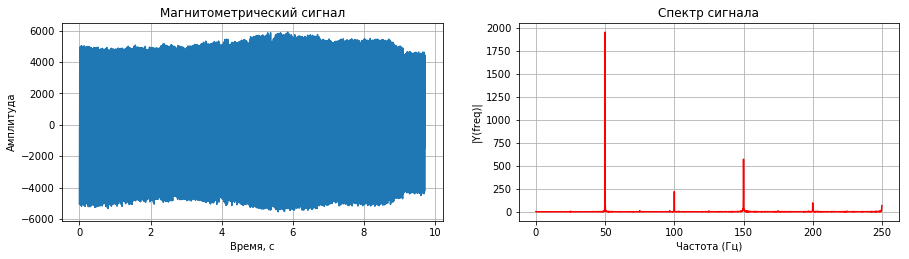

In [6]:
plt.figure(figsize = (15, 8))
subplot(2,2,1)
PlotSignal(time_x,magnito_signal, 'Магнитометрический')
subplot(2,2,2)
CreatSpectrum(magnito_signal,Fs)
show()

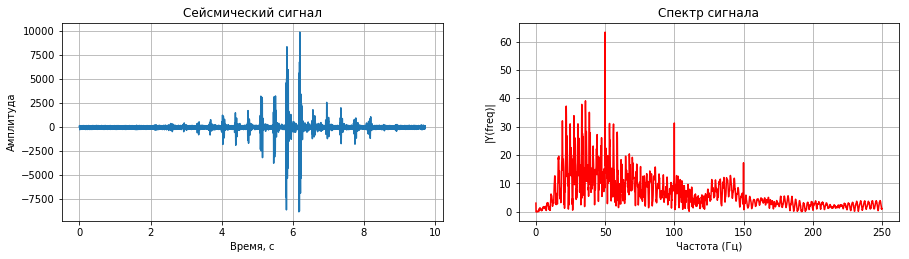

In [7]:
plt.figure(figsize = (15, 8))
subplot(2,2,1)
PlotSignal(time_x,seismic_signal, 'Сейсмический')
subplot(2,2,2)
CreatSpectrum(seismic_signal,Fs)
show()

При рассмотрении спектров реализаций сильно выделяется составляющая равна 50 Гц и ее гармоники (100, 150, 200, 250 Гц), 50 Гц помеховая частота по питанию, которую требуется подавить.

### Фильтрация сигналов

In [8]:
from scipy import signal

Рассмортим четыре типа электронных фильтров:
 * Фильтр Баттерворта - он проектируется так, чтобы его амплитудно-частотная характеристика была <b>максимально гладкой</b> на частотах полосы пропускания.
 * Фильтр Чебышёва - он проектируется так, чтобы амплитудно-частотная характеристика имела <b>более крутой спад </b> на частотах полосы пропускания.
 * Эллиптический фильтр (Фильтр Кауэра) — характерной особенностью которого являются <b>пульсации</b> амплитудно-частотной характеристики как в полосе пропускания, так и полосе подавления. 
 
Построим АЧХ данных фильтров:

 * Фильтр Баттерворта

In [9]:
def butter_plot(cutOff, order = 5):
    leg =[]
    b, a = signal.butter(order, cutOff, 'low', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)), linewidth=3)
    plt.title('Фильтр Баттерворта')
    plt.xlabel('Частота, Гц')
    plt.ylabel('Амплитуда, дБ')
    leg.append('фильтр Баттерворта')
    plt.axvline(cutOff, color='red')
    leg.append('частота среза = ' + str(cutOff)+' Гц')
    plt.legend(leg)
    plt.grid(which='both', axis='both')

 * Фильтры Чебышёва 1 и 2 рода

In [10]:
def cheby1_plot(cutOff, rp, order = 5):
    leg =[]
    for rp_i in rp:
        b, a = signal.cheby1(order, rp_i, cutOff, 'low', analog=True)
        w, h = signal.freqs(b, a)
        plt.semilogx(w, 20 * np.log10(abs(h)), linewidth=3)
        plt.title('Фильтра Чебышёва 1 рода')
        plt.xlabel('Частота, Гц')
        plt.ylabel('Амплитуда, дБ')
        leg.append('Пульсация частоты = '+str(rp_i)+' дБ')
    plt.axvline(cutOff, color='red')
    leg.append('частота среза = ' + str(cutOff)+' Гц')
    plt.legend(leg)
    plt.grid(which='both', axis='both')

def cheby2_plot(cutOff, rp, order = 5):
    leg =[]
    for rp_i in rp:
        b, a = signal.cheby2(order, rp_i, cutOff, 'low', analog=True)
        w, h = signal.freqs(b, a)
        plt.semilogx(w, 20 * np.log10(abs(h)), linewidth=3)
        plt.title('Фильтр Чебышёва 2 рода')
        plt.xlabel('Частота, Гц')
        plt.ylabel('Амплитуда, дБ')
        leg.append('Пульсация частоты = '+str(rp_i)+' дБ')
    plt.axvline(cutOff, color='red')
    leg.append('частота среза = ' + str(cutOff)+' Гц')
    plt.legend(leg)
    plt.grid(which='both', axis='both')

In [11]:
def ellip_plot(cutOff, rp, rc, order = 5):
    leg =[]
    for rp_i in rp:
        for rc_i in rc:
            b, a = signal.ellip(order, rp_i, rc_i, cutOff, 'low', analog=True)
            w, h = signal.freqs(b, a)
            plt.semilogx(w, 20 * np.log10(abs(h)), linewidth=3)
            plt.title('Фильтр Эллиптический')
            plt.xlabel('Частота, Гц')
            plt.ylabel('Амплитуда, дБ')
            leg.append('Пульсация = '+str(rp_i)+' дБ' + ', затухание = '+str(rc_i)+' дБ')
    plt.axvline(cutOff, color='red')
    leg.append('частота среза = ' + str(cutOff)+' Гц')
    plt.legend(leg)
    plt.grid(which='both', axis='both')

Визуализируем АЧХ подготовленных фильтров

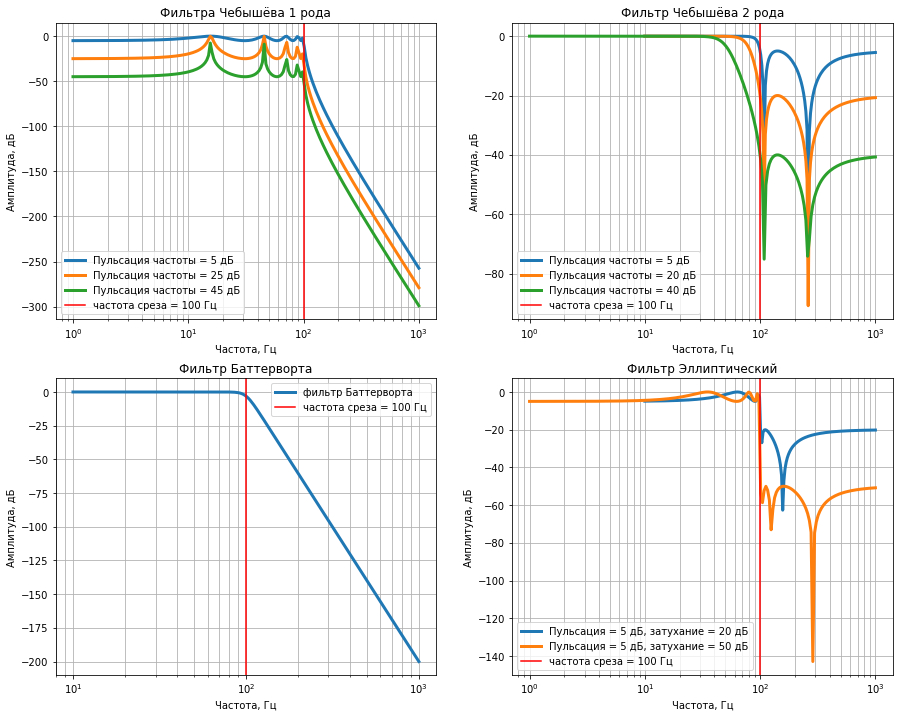

In [12]:
fCut = 100 # Частота среза
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
cheby1_plot(fCut, [5, 25, 45], order = 10)
plt.subplot(2,2,2)
cheby2_plot(fCut, [5, 20, 40], order = 4)
plt.subplot(2,2,3)
butter_plot(fCut, order = 10)
plt.subplot(2,2,4)
ellip_plot(fCut, [5], [20, 50], order = 10)
show()

Для примера рассмотрим четыре типа фильтров Баттерворта:
 * Фильтр нижних частот - пропускает частоты ниже частоты среза и не пропускает частоты выше частоты среза.
 * Фильтр верхних частот - пропускает частоты выше частоты среза и не пропускает частоты ниже частоты среза.
 * Полосовый фильтр - получает на вход две частоты нижняя и верхняя частоты среза, который в пределах этих значений пропускает частоты.
 * Режекторный фильтр - получает на вход две частоты нижняя и верхняя частоты среза, который в пределах этих значений не пропускает частоты.

Для фильтрации сигналов используется функция butter, которая позволяет создавать различные по типу и полосам пропускания фильтры, так например:
 * btype='lowpass' - означает ФНЧ.
 * btype='highpass' - означает ФВЧ.
 * btype='bandpass' - означает полосовый фильтр
 * btype='bandstop' - означает режекторный фильтр
 
Сгенерируем функции для этих фильтров, и визуалиазируем их (будем использовать цифровой фильтр analog = False)

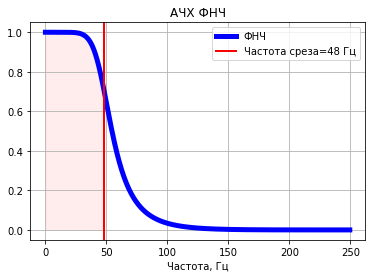

In [13]:
# Фильтр нижних частот
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y
def butter_plot_lowpass(cutOff, fs, order=5):
    b, a = butter_lowpass(cutOff, fs, order = order)
    w, h = signal.freqz(b, a)
    #plt.plot(0.5*fs*w/np.pi, 20 * np.log10(abs(h)), 'b', linewidth=5)
    plt.plot(0.5*fs*w/np.pi, abs(h), 'b', linewidth=5)
    #plt.xlim(0, 0.5*fs)
    plt.title("АЧХ ФНЧ")
    plt.fill_between(0.5*fs*w/np.pi, 0, np.abs(h), 0.5*fs*w/np.pi< cutOff, alpha = 0.07, color = 'r')
    plt.xlabel('Частота, Гц')
    plt.axvline(cutOff, color='r', linewidth=2)
    plt.legend(['ФНЧ','Частота среза='+str(cutOff)+' Гц'])
    plt.grid()
butter_plot_lowpass(48, Fs, order = 4)
show()

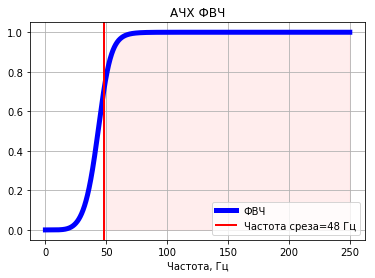

In [14]:
# Фильтр верхних частот
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='highpass', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y
def butter_plot_highpass(cutOff, fs, order=5):
    b, a = butter_highpass(cutOff, fs, order = order)
    w, h = signal.freqz(b, a, worN=8000)
    plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b', linewidth=5)

    #plt.xlim(0, 0.5*fs)
    plt.title("АЧХ ФВЧ")
    plt.xlabel('Частота, Гц')
    plt.axvline(cutOff, color='r', linewidth=2)
    plt.fill_between(0.5*fs*w/np.pi, 0, np.abs(h), 0.5*fs*w/np.pi> cutOff, alpha = 0.07, color = 'r')
    plt.legend(['ФВЧ','Частота среза='+str(cutOff)+' Гц'])
    plt.grid()
butter_plot_highpass(48, Fs)
show()

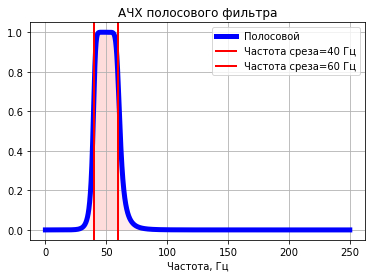

In [15]:
# Полосовой фильтр
def butter_bandpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = [cutoff[0]/nyq, cutoff[1]/nyq]
    b, a = signal.butter(order, normal_cutoff, btype='bandpass', analog=False)
    return b, a

def butter_bandpass_filter(data, cutoff, fs, order=5):
    b, a = butter_bandpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y
def butter_plot_bandpass(cutOff, fs, order=5):
    b, a = butter_bandpass(cutOff, fs, order = order)
    w, h = signal.freqz(b, a, worN=8000)
    plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b', linewidth=5)

    #plt.xlim(0, 0.5*fs)
    plt.title("АЧХ полосового фильтра")
    plt.xlabel('Частота, Гц')
    plt.axvline(cutOff[0], color='r', linewidth=2)
    plt.axvline(cutOff[1], color='r', linewidth=2)
    plt.legend(['Полосовой', 'Частота среза='+str(cutOff[0])+' Гц', 'Частота среза='+str(cutOff[1])+' Гц'])
    plt.fill_between(0.5*fs*w/np.pi, 0, np.abs(h), 0.5*fs*w/np.pi> cutOff[0], alpha = 0.07, color = 'r')
    plt.fill_between(0.5*fs*w/np.pi, 0, np.abs(h), 0.5*fs*w/np.pi< cutOff[1], alpha = 0.07, color = 'r')
    plt.grid()
butter_plot_bandpass([40, 60], Fs)
show()

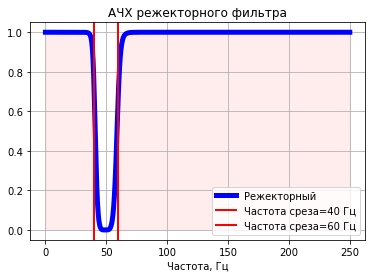

In [16]:
# Режекторный фильтр
def butter_bandstop(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = [cutoff[0]/nyq, cutoff[1]/nyq]
    b, a = signal.butter(order, normal_cutoff, btype='bandstop', analog=False)
    return b, a

def butter_bandstop_filter(data, cutoff, fs, order=5):
    b, a = butter_bandstop(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y
def butter_plot_bandstop(cutOff, fs, order=5):
    b, a = butter_bandstop(cutOff, fs, order = order)
    w, h = signal.freqz(b, a, worN=8000)
    plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b', linewidth=5)
    plt.title("АЧХ режекторного фильтра")
    plt.xlabel('Частота, Гц')
    plt.axvline(cutOff[0], color='r', linewidth=2)
    plt.axvline(cutOff[1], color='r', linewidth=2)
    plt.legend(['Режекторный', 'Частота среза='+str(cutOff[0])+' Гц', 'Частота среза='+str(cutOff[1])+' Гц'])
    plt.fill_between(0.5*fs*w/np.pi, 0, np.abs(h), 0.5*fs*w/np.pi< cutOff[0], alpha = 0.07, color = 'r')
    plt.fill_between(0.5*fs*w/np.pi, 0, np.abs(h), 0.5*fs*w/np.pi> cutOff[1], alpha = 0.07, color = 'r')
    plt.grid()
butter_plot_bandstop([40, 60], Fs)
show()

Применим один раз ФНЧ и четыре раза режекторный фильтр для наших сигналов. 

Сначала применим фильтры к магнитометрическому сигналу

In [17]:
def sub_plot_signal_spectr(signal, name, Fs):
    time_x = linspace(0,len(signal)/Fs, len(signal))
    plt.figure(figsize = (15, 8))
    subplot(2,2,1)
    PlotSignal(time_x,signal, name)
    subplot(2,2,2)
    CreatSpectrum(signal,Fs)

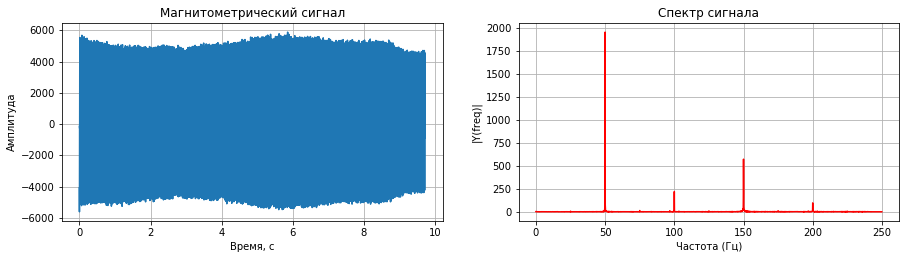

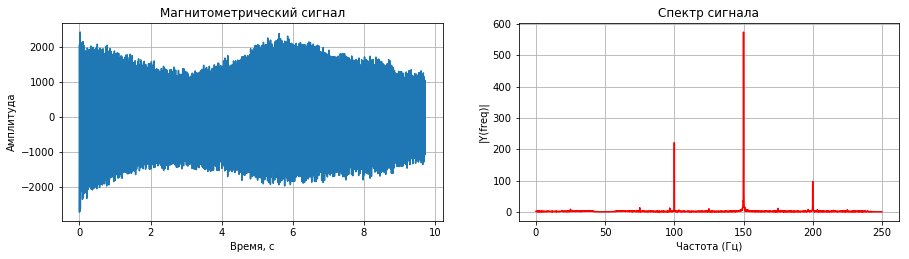

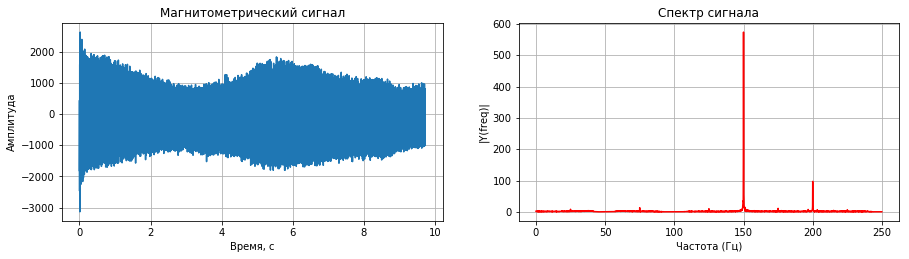

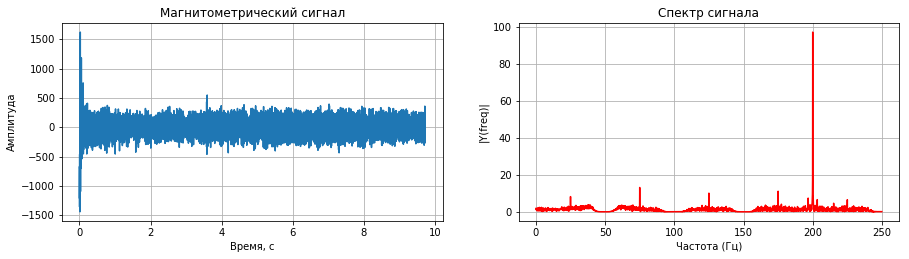

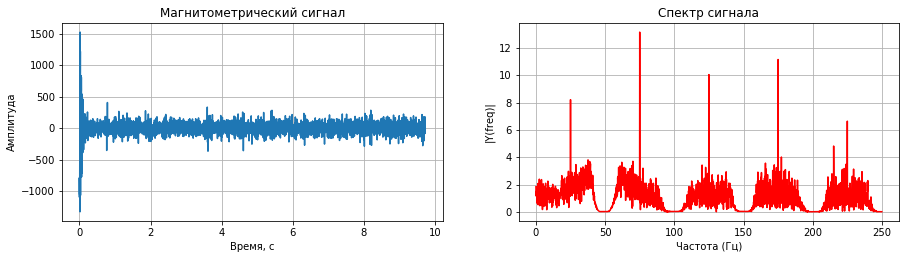

In [18]:
n_filter = int(Fs / 2 / 50)
width_window = 10

magnito_signal_filter = magnito_signal
magnito_signal_filter = butter_lowpass_filter(magnito_signal_filter, 250-width_window, Fs, order = 5)
sub_plot_signal_spectr(magnito_signal_filter, 'Магнитометрический', 500)

for i in range(n_filter-1):
    magnito_signal_filter = butter_bandstop_filter(magnito_signal_filter, [50*(i+1)-width_window, 50*(i+1)+width_window], Fs)
    sub_plot_signal_spectr(magnito_signal_filter, 'Магнитометрический', 500)
show()

Результаты уже лучше, но еще не достаточно хорошо. Вспомним, магнитометрический сигнал расположен в диапозоне от единиц до десятков Гц. Воспользуемся этим и применим ФНЧ.

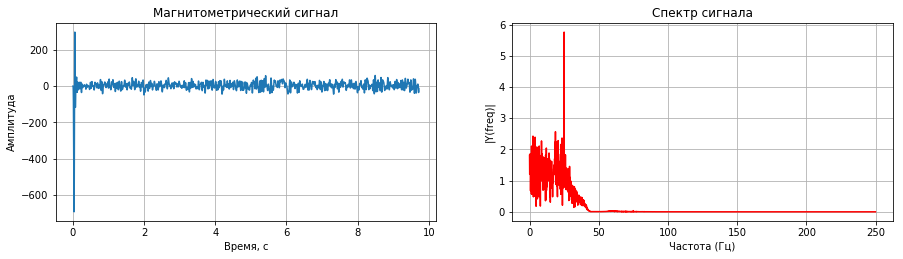

In [19]:
width_window = 10

magnito_signal_filter_hard = magnito_signal_filter
magnito_signal_filter_hard = butter_lowpass_filter(magnito_signal_filter_hard, 25, Fs)
sub_plot_signal_spectr(magnito_signal_filter_hard, 'Магнитометрический', 500)
show()

А теперь применим для сейсмического сигнала.

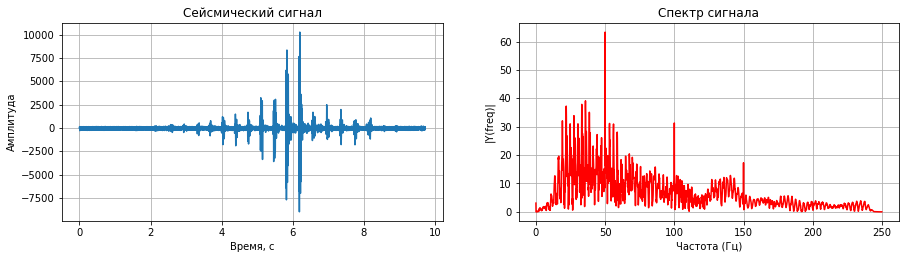

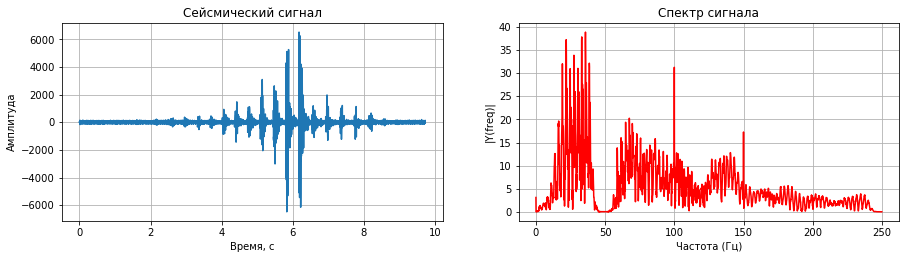

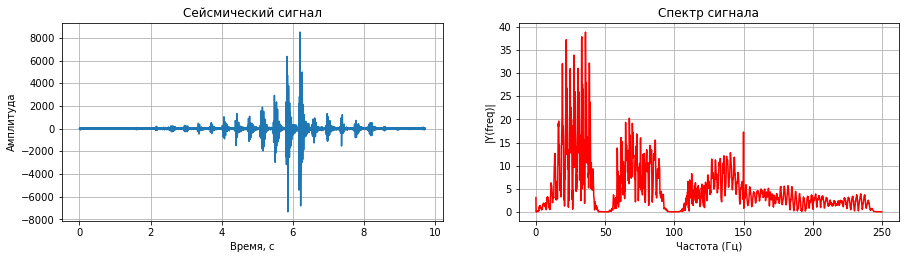

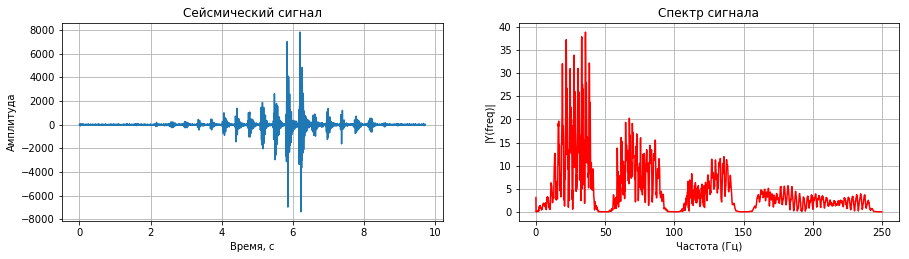

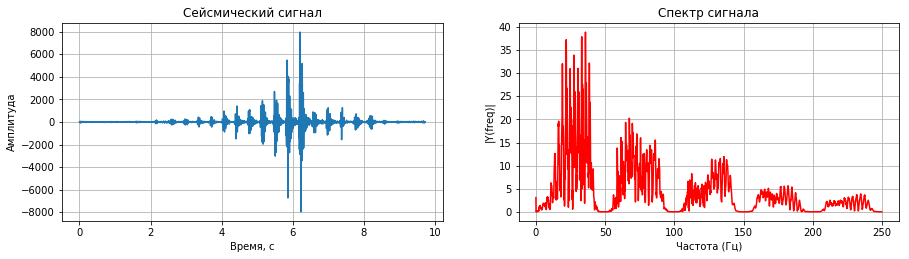

In [20]:
n_filter = int(Fs / 2 / 50)
width_window = 10

seismic_signal_filter = seismic_signal
seismic_signal_filter = butter_lowpass_filter(seismic_signal_filter, 250-width_window, Fs, order = 5)
sub_plot_signal_spectr(seismic_signal_filter, 'Сейсмический', 500)

for i in range(n_filter-1):
    seismic_signal_filter = butter_bandstop_filter(seismic_signal_filter, [50*(i+1)-width_window, 50*(i+1)+width_window], Fs)
    sub_plot_signal_spectr(seismic_signal_filter, 'Сейсмический', 500)
show()

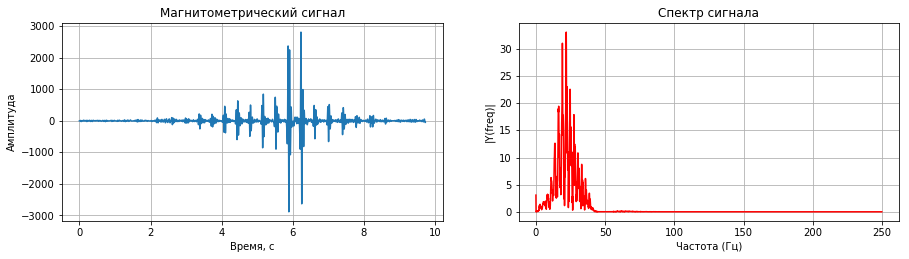

In [21]:
width_window = 10

seismic_signal_filter_hard = seismic_signal_filter
seismic_signal_filter_hard = butter_lowpass_filter(seismic_signal_filter_hard, 25, Fs)
sub_plot_signal_spectr(seismic_signal_filter_hard, 'Магнитометрический', 500)
show() 

Совместим две реализации

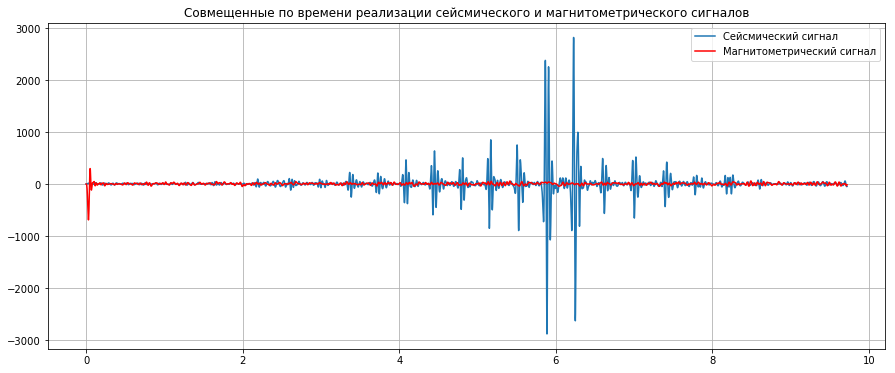

In [22]:
time_x = linspace(0,len(seismic_signal_filter_hard)/Fs, len(seismic_signal_filter_hard))
plt.figure(figsize = (15, 6))
plt.title('Совмещенные по времени реализации сейсмического и магнитометрического сигналов')
plt.plot(time_x,seismic_signal_filter_hard, )
plt.plot(time_x,magnito_signal_filter_hard, 'r')
plt.legend(['Сейсмический сигнал', 'Магнитометрический сигнал'])
plt.grid()
show()